In [1]:
import sys
sys.path.append('..')

from utils.common import read_beacon_coords, read_beacon_data, process_beacon_data, process_beacon_data_for_pos
import argparse
import pandas as pd

args = argparse.Namespace(beacon_coords_file='../data0827a/beacon_coords.txt', beacon_data_file='../data0827a/bluetoothData(58).txt', update_frequency=10)

actual_coords = read_beacon_coords(args.beacon_coords_file)
beacon_data = read_beacon_data(args.beacon_data_file)
print("beacon data",beacon_data)
print("beacon group num", len(beacon_data))

beacon data [[{'uuid': '1a040000-0000-0000-0000-000000000000', 'rssi': -77, 'accuracy': 101.9332205122438, 'time': 1724729320987}], [{'uuid': '1a040000-0000-0000-0000-000000000000', 'rssi': -77, 'accuracy': 101.9332205122438, 'time': 1724729321081}, {'uuid': '88400000-0000-0000-0000-000000000000', 'rssi': -66, 'accuracy': 22.427865743036918, 'time': 1724729321081}, {'uuid': '0f3c0000-0000-0000-0000-000000000000', 'rssi': -69, 'accuracy': 34.59438414037775, 'time': 1724729321081}], [{'uuid': '1a040000-0000-0000-0000-000000000000', 'rssi': -77, 'accuracy': 101.9332205122438, 'time': 1724729321184}, {'uuid': '88400000-0000-0000-0000-000000000000', 'rssi': -63, 'accuracy': 14.323008481499683, 'time': 1724729321184}, {'uuid': '0f3c0000-0000-0000-0000-000000000000', 'rssi': -66, 'accuracy': 22.427865743036918, 'time': 1724729321184}], [{'uuid': '1a040000-0000-0000-0000-000000000000', 'rssi': -77, 'accuracy': 101.9332205122438, 'time': 1724729321285}, {'uuid': '88400000-0000-0000-0000-0000000

In [2]:
positions = process_beacon_data_for_pos(args)

# print(args.beacon_data_file)

print(positions)

../data0827a/beacon_coords.txt
beacon_data [[{'uuid': '1a040000-0000-0000-0000-000000000000', 'rssi': -77, 'accuracy': 101.9332205122438, 'time': 1724729320987}], [{'uuid': '1a040000-0000-0000-0000-000000000000', 'rssi': -77, 'accuracy': 101.9332205122438, 'time': 1724729321081}, {'uuid': '88400000-0000-0000-0000-000000000000', 'rssi': -66, 'accuracy': 22.427865743036918, 'time': 1724729321081}, {'uuid': '0f3c0000-0000-0000-0000-000000000000', 'rssi': -69, 'accuracy': 34.59438414037775, 'time': 1724729321081}], [{'uuid': '1a040000-0000-0000-0000-000000000000', 'rssi': -77, 'accuracy': 101.9332205122438, 'time': 1724729321184}, {'uuid': '88400000-0000-0000-0000-000000000000', 'rssi': -63, 'accuracy': 14.323008481499683, 'time': 1724729321184}, {'uuid': '0f3c0000-0000-0000-0000-000000000000', 'rssi': -66, 'accuracy': 22.427865743036918, 'time': 1724729321184}], [{'uuid': '1a040000-0000-0000-0000-000000000000', 'rssi': -77, 'accuracy': 101.9332205122438, 'time': 1724729321285}, {'uuid': '

[[{'uuid': '1a040000-0000-0000-0000-000000000000', 'rssi': -77, 'accuracy': 101.9332205122438, 'time': 1724729320987}], [{'uuid': '1a040000-0000-0000-0000-000000000000', 'rssi': -77, 'accuracy': 101.9332205122438, 'time': 1724729321081}, {'uuid': '88400000-0000-0000-0000-000000000000', 'rssi': -66, 'accuracy': 22.427865743036918, 'time': 1724729321081}, {'uuid': '0f3c0000-0000-0000-0000-000000000000', 'rssi': -69, 'accuracy': 34.59438414037775, 'time': 1724729321081}], [{'uuid': '1a040000-0000-0000-0000-000000000000', 'rssi': -77, 'accuracy': 101.9332205122438, 'time': 1724729321184}, {'uuid': '88400000-0000-0000-0000-000000000000', 'rssi': -63, 'accuracy': 14.323008481499683, 'time': 1724729321184}, {'uuid': '0f3c0000-0000-0000-0000-000000000000', 'rssi': -66, 'accuracy': 22.427865743036918, 'time': 1724729321184}], [{'uuid': '1a040000-0000-0000-0000-000000000000', 'rssi': -77, 'accuracy': 101.9332205122438, 'time': 1724729321285}, {'uuid': '88400000-0000-0000-0000-000000000000', 'rss

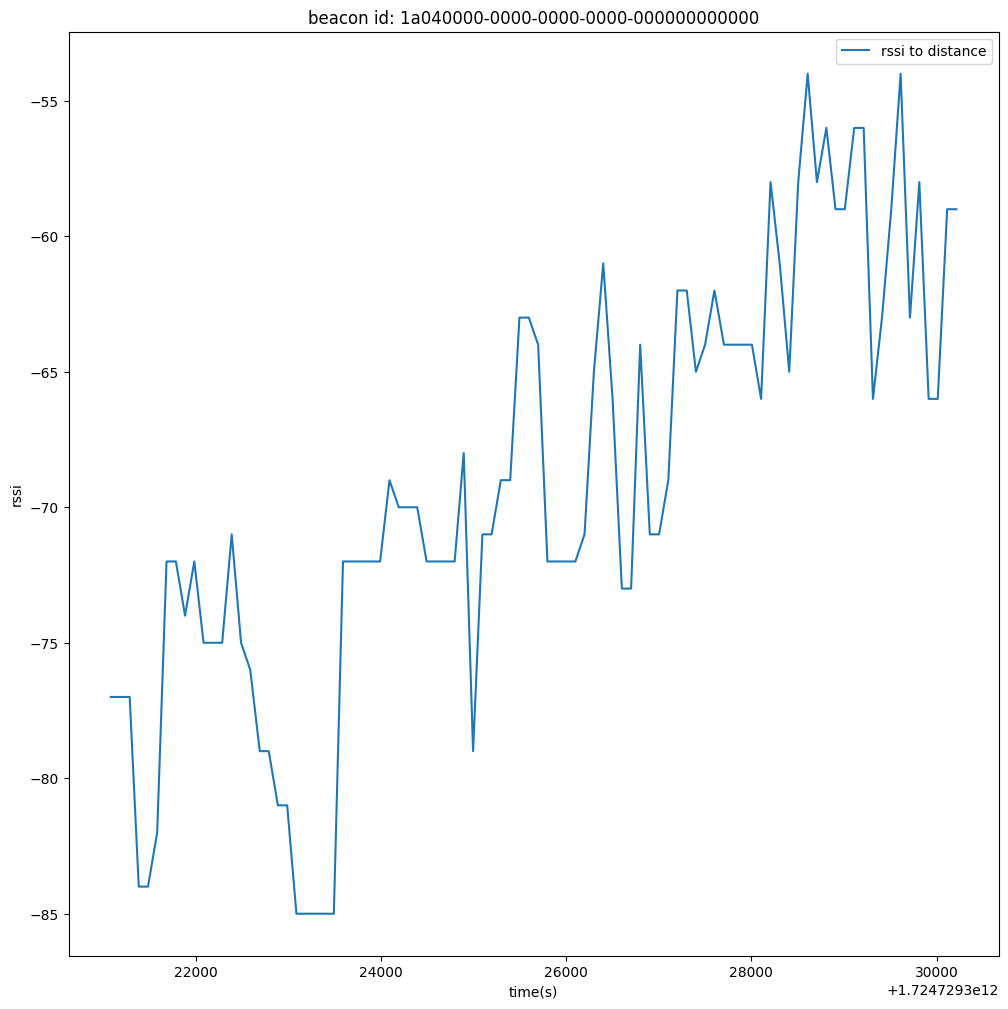

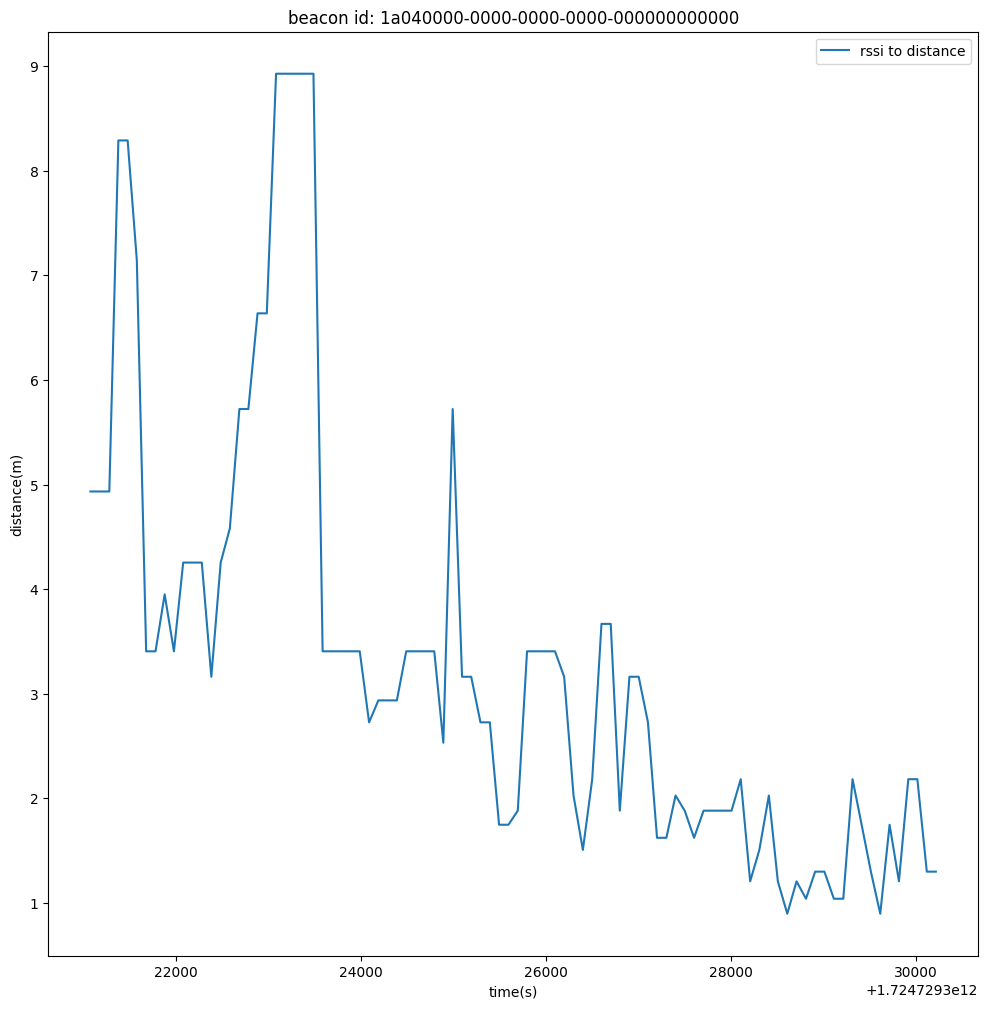

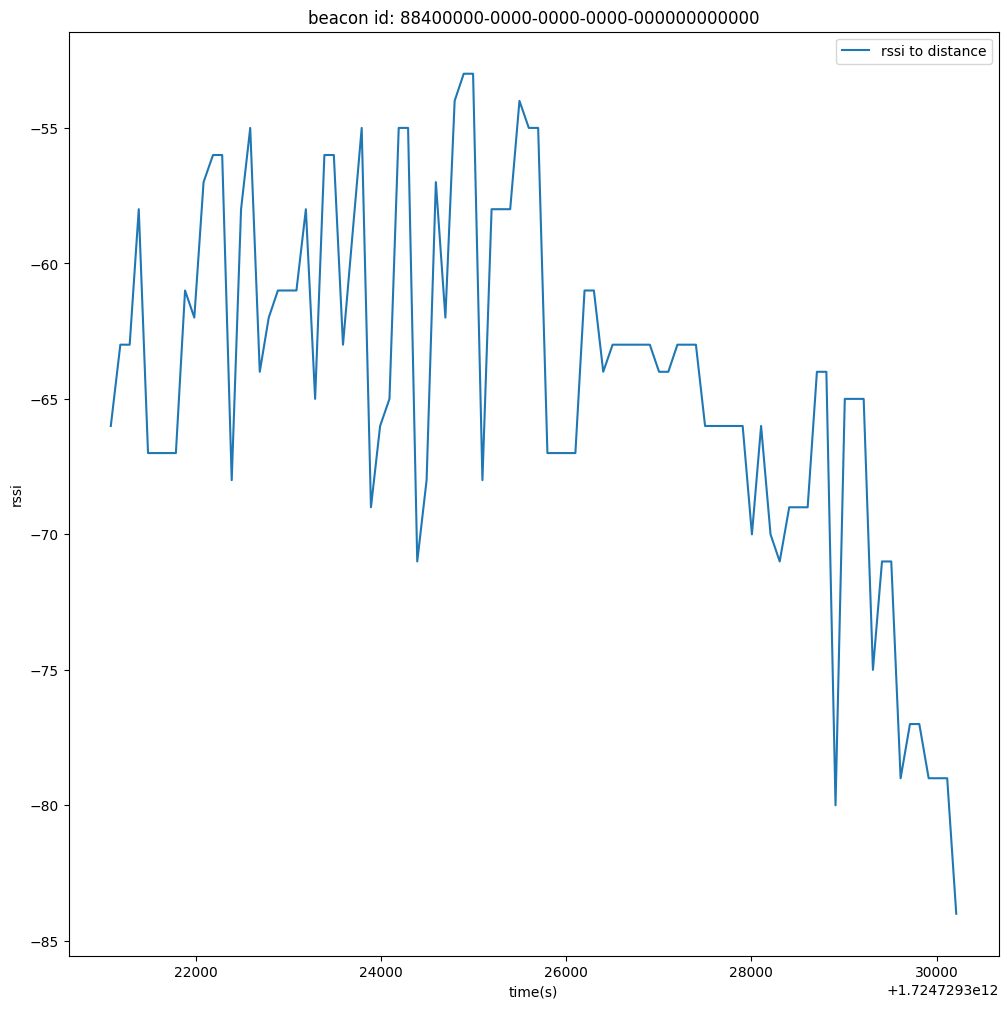

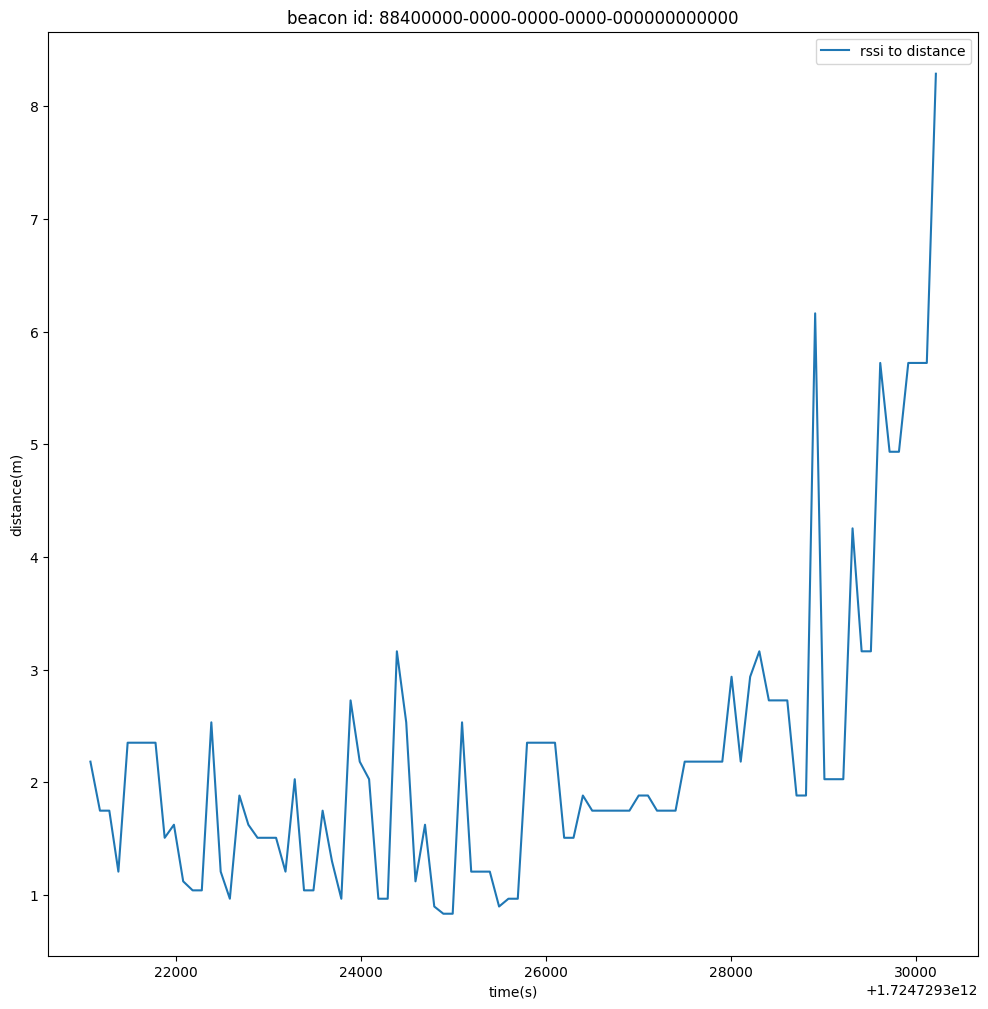

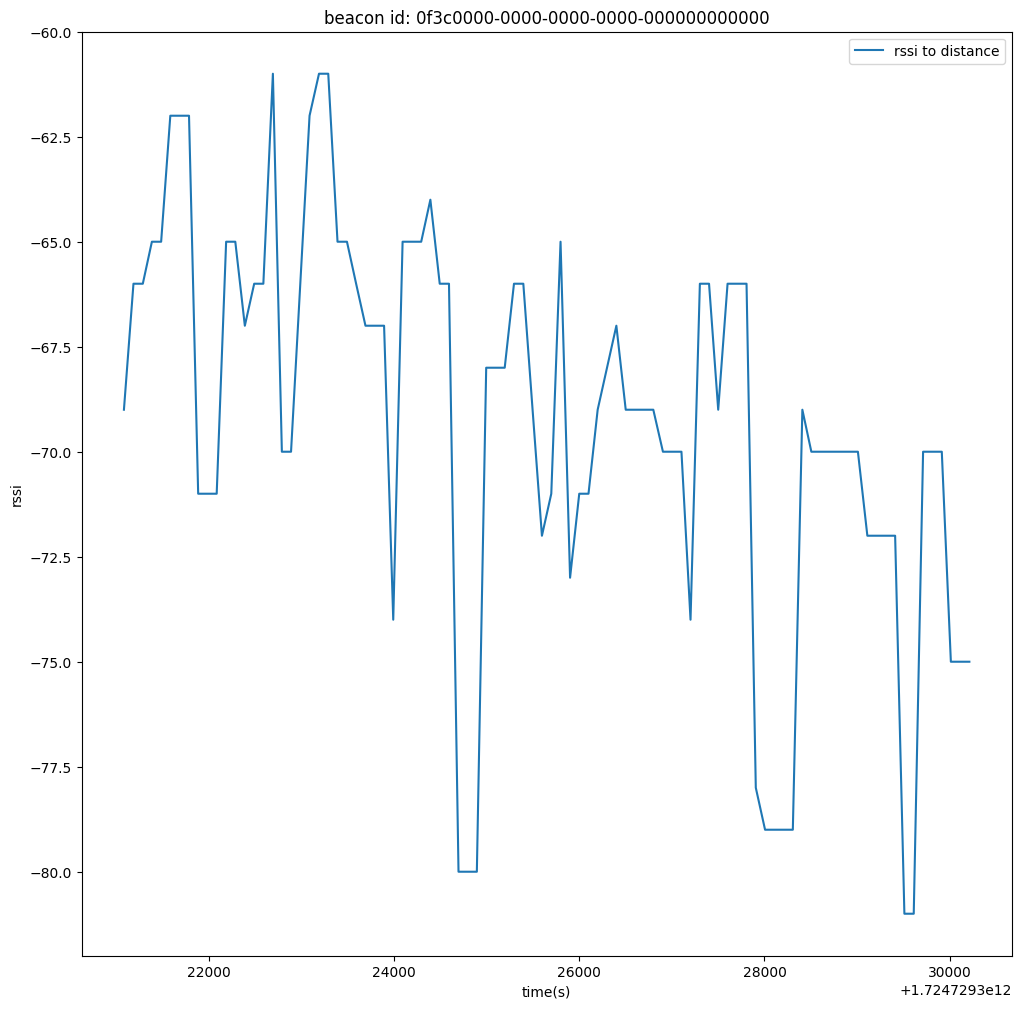

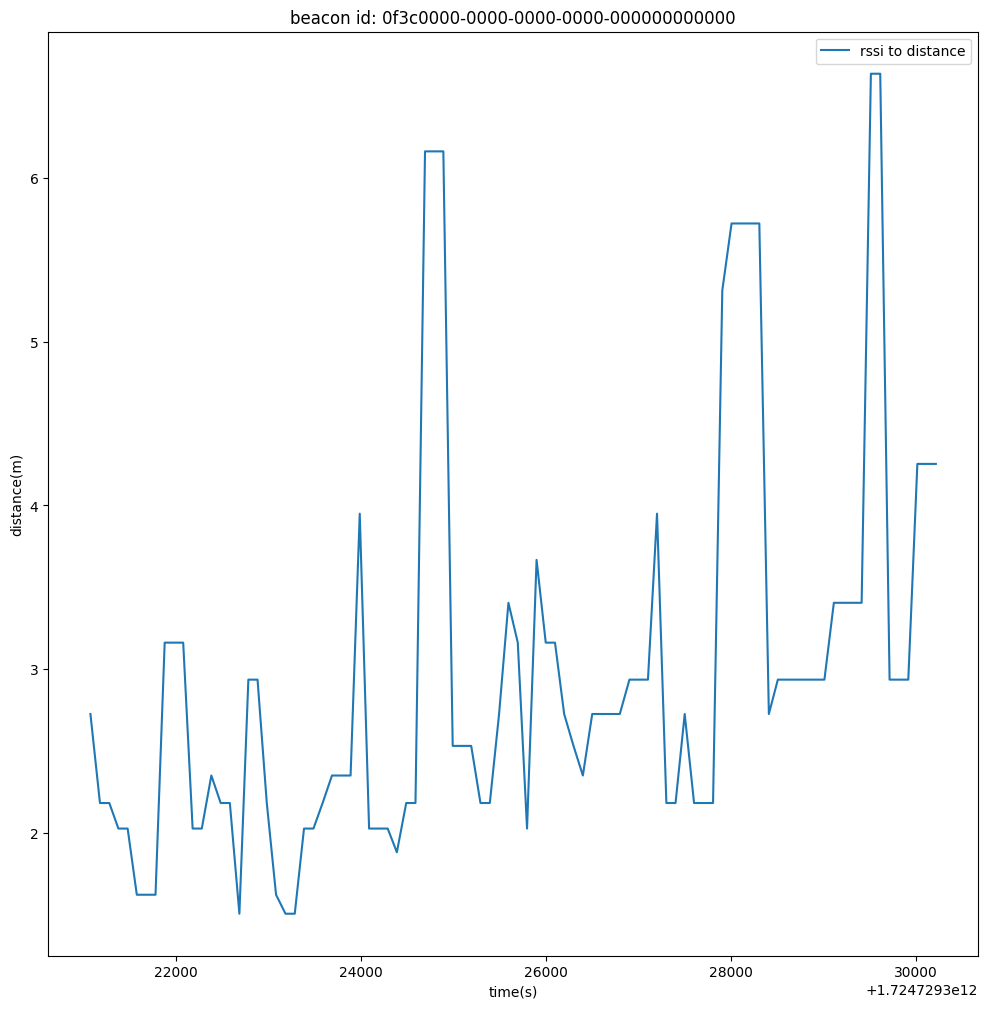

In [17]:
# visualize the beacon RSSI to distance
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import pdb


def rssi_to_distance(rssi):
    txPower = -55.47
    n = 3.106
    return 10 ** ((txPower - rssi) / (10 * n))

beacon_id_to_rssi = defaultdict(list)
time_stamp = []
print(beacon_data)
for beacon_group in beacon_data:
    if len(beacon_group) < 3:
        print("beacon group length is less than 3")
        continue
    for beacon in beacon_group:
        beacon_id = beacon['uuid']
        beacon_id_to_rssi[beacon_id].append(beacon['rssi'])
    time_stamp.append(beacon['time'])

    
for beacon_id, rssi_values in beacon_id_to_rssi.items():
    if len(beacon_group[0]) <= 3:
        print("beacon group length is less than 3")
        continue
    plt.figure(figsize=(12, 12))
    distance = [rssi_to_distance(rssi) for rssi in rssi_values]
    plt.plot(time_stamp, rssi_values, label='rssi to distance')
    plt.xlabel('time(s)')
    plt.ylabel('rssi')
    plt.legend()
    plt.title('beacon id: {}'.format(beacon_id))
    plt.show()
    
    plt.figure(figsize=(12, 12))
    plt.plot(time_stamp, distance, label='rssi to distance')
    plt.xlabel('time(s)')
    plt.ylabel('distance(m)')
    plt.title('beacon id: {}'.format(beacon_id))
    plt.legend()
    plt.show()


{'88400000-0000-0000-0000-000000000000': {'x': 0.0, 'y': 0.0, 'z': 0.0}, '0f3c0000-0000-0000-0000-000000000000': {'x': 6.0, 'y': 3.0, 'z': 0.0}, '1a040000-0000-0000-0000-000000000000': {'x': 0.0, 'y': 6.0, 'z': 0.0}}
[None, array([[2.36519898],
       [1.5161905 ],
       [0.81891898]]), array([[2.52548596],
       [1.58578123],
       [0.86167716]]), array([[2.5987187 ],
       [1.6175804 ],
       [0.88121436]]), array([[2.91045902],
       [0.97084395],
       [0.89337664]]), array([[3.40397668],
       [0.58695008],
       [0.90074346]]), array([[3.66165453],
       [0.64222062],
       [0.90483395]]), array([[3.36584954],
       [1.40806267],
       [0.90680866]]), array([[3.15938881],
       [1.91744981],
       [0.9075848 ]]), array([[2.67001592],
       [1.96795301],
       [0.90768878]]), array([[2.30620882],
       [2.11669057],
       [0.9074483 ]]), array([[2.07468368],
       [1.98935823],
       [0.90705582]]), array([[2.10553303],
       [1.95202811],
       [0.9065751 ]

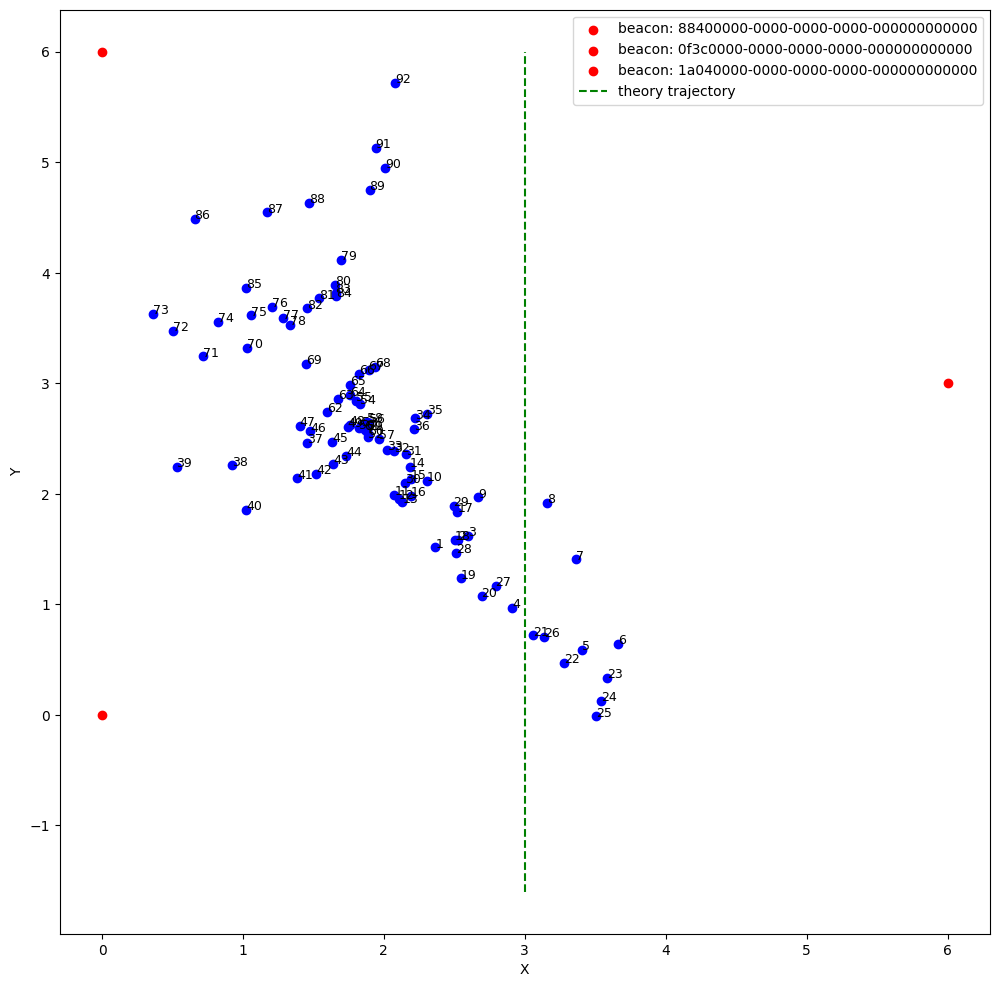

In [ ]:
print(actual_coords)
print(positions)
print("pos total num", len(positions))

plt.figure(figsize=(12, 12))
for i in actual_coords:
    plt.scatter(actual_coords[i]['x'], actual_coords[i]['y'], c='r', label=f"beacon: {i}")
for i, pos in enumerate(positions):
    if pos is None:
        continue
    plt.scatter(pos[0], pos[1], c='b')
    plt.text(pos[0], pos[1], f"{i}", fontsize=9)
plt.vlines(3, -1.6, 6, colors='g', linestyles='dashed', label='theory trajectory')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

